In [2]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import astropy.io.fits
%matplotlib inline

### read data into notebook

In [3]:
data = fits.getdata("UDFf105.fits")
rcParams['figure.figsize']=[10.,8.]
data = data.byteswap().newbyteorder()

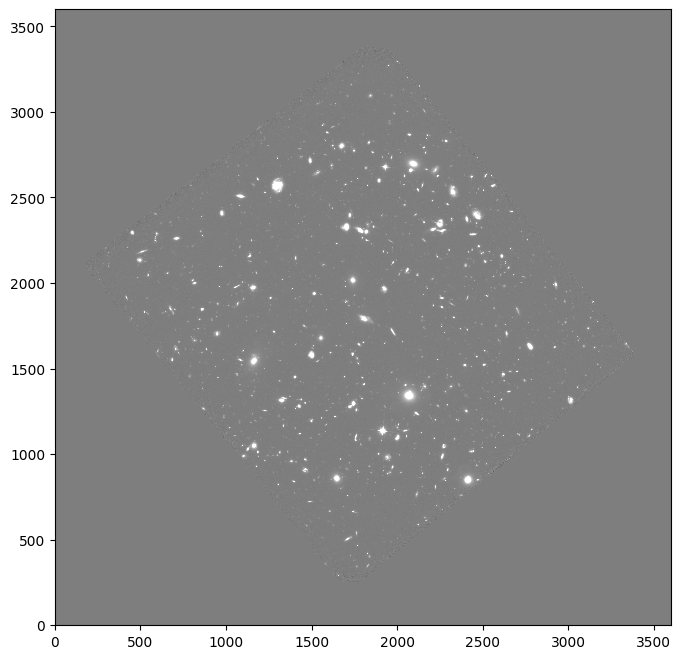

In [4]:
m,s = np.mean(data),np.std(data)

plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('mgf105graymap.png', dpi=600, bbox_inches='tight')

### Background Subtraction

In [5]:
bkg = sep.Background(data)


print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


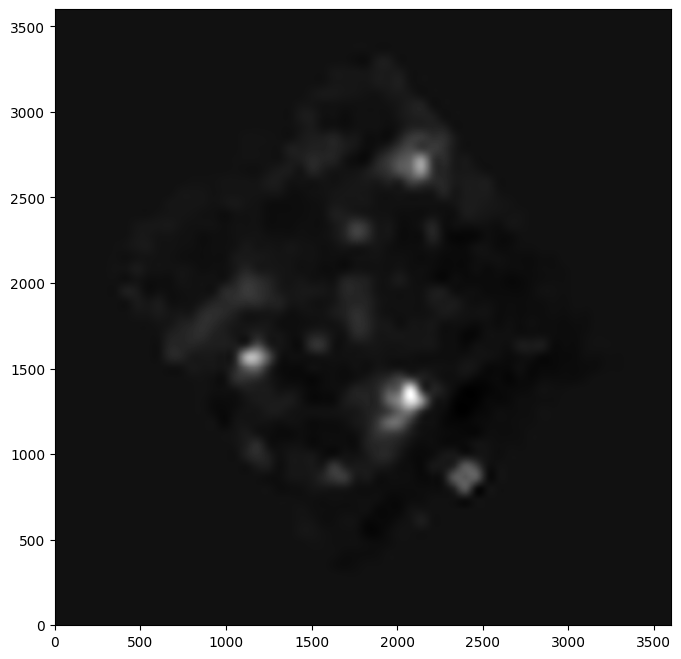

In [6]:
bkgimage=bkg.back()
plt.imshow(bkgimage, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('mgbkgimage.png', dpi=600, bbox_inches='tight')

#### plotted the background of the data and saved image

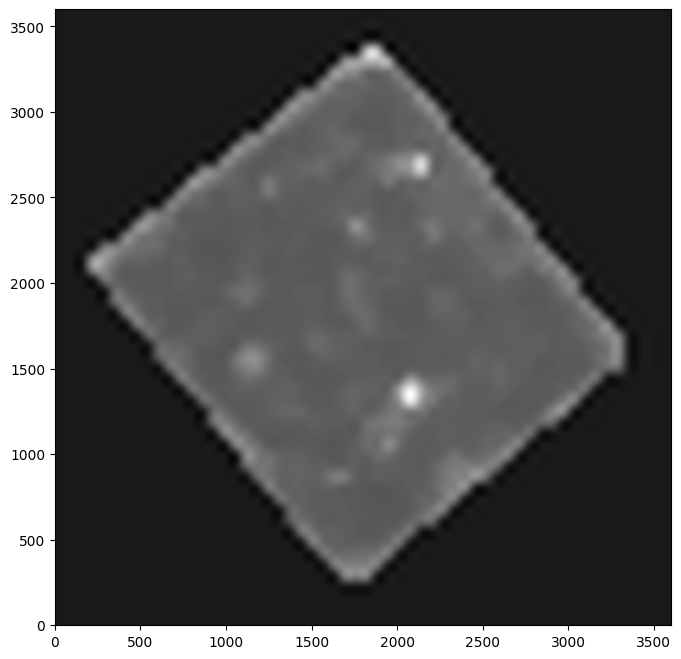

In [12]:
bkgrms=bkg.rms()
plt.imshow(bkgrms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('mgbkgrms.png', dpi=600, bbox_inches='tight')

#### plotted the rms and saved file

In [13]:
data_sub=data-bkg


In [14]:
threshold= 5
objects=sep.extract(data_sub,threshold,err=bkg.globalrms)

In [15]:
len(objects)

2634

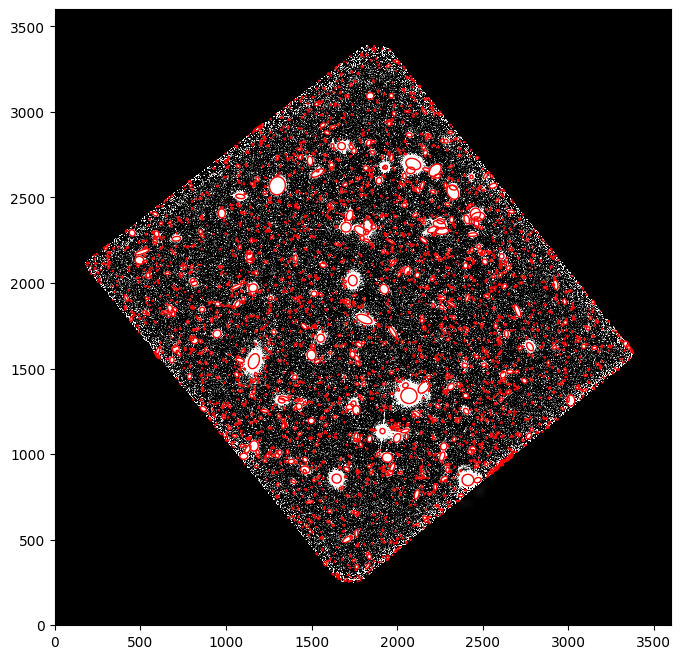

In [16]:
fig,ax = plt.subplots()
m,s = np.mean(data_sub),np.mean(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('mgcircleddata.png', dpi=600, bbox_inches='tight')

In [17]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)



In [18]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.029248 +/- 0.171045
object 1: flux = 0.081285 +/- 0.285120
object 2: flux = 0.062260 +/- 0.249537
object 3: flux = 0.069449 +/- 0.263548
object 4: flux = 0.039489 +/- 0.198739
object 5: flux = 0.104682 +/- 0.323559
object 6: flux = 0.040038 +/- 0.200116
object 7: flux = 0.053010 +/- 0.230257
object 8: flux = 0.053288 +/- 0.230859
object 9: flux = 0.042534 +/- 0.206259


## Flux Histogram

/tmp/ipykernel_189612/2840271085.py:1: RuntimeWarning: invalid value encountered in log10
  logflux=np.log10(flux)


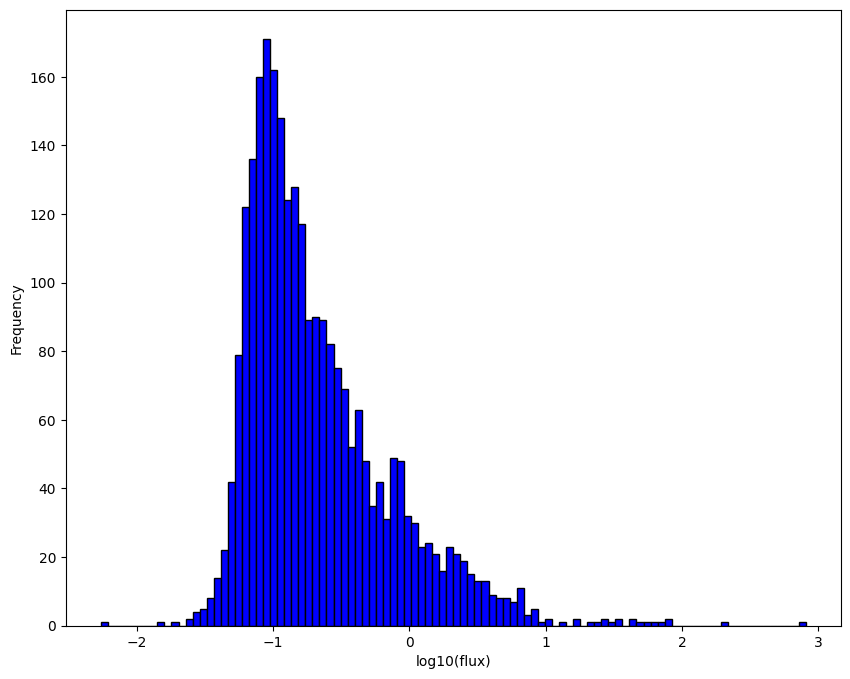

In [19]:
logflux=np.log10(flux)
plt.hist(logflux,bins=100,color='blue',edgecolor='black')
plt.xlabel('log10(flux)')
plt.ylabel('Frequency')
plt.savefig('mghistogram.png', dpi=600,bbox_inches='tight')

#### creates a historgram and distributed it amoungst the 100 bin

In [15]:

fm,fs, fmd =np.mean(flux),np.std(flux),np.median(flux)

print(f'Mean: {fm:21.3f}  +/-{np.mean(fluxerr):.3f}\nStandard Deviation: {fs:7.3f}  +/-{np.std(fluxerr):.3f}\nMedian: {fmd:19.3f} +/- {np.median(fluxerr):.3f}')

Mean:                 1.144  +/-0.599
Standard Deviation:  16.720  +/-0.886
Median:               0.151 +/- 0.389


#### print the largest outlier

In [16]:
sortedflux=np.sort(flux)
print(f'Largest outlier: {sortedflux[-1]:.4f}\nStandard deviations away: {(sortedflux[-1]-fm)/fs:.4f}')

Largest outlier: 807.3368
Standard deviations away: 48.2178
